## STEG 1: DATAINSAMLING 

**Uppgift**: Ladda in data och beskriv den

In [1]:
#Importera pandas
import pandas as pd

#Ladda in data från CSV-fil
df_home = pd.read_csv("Real_estate.csv") 
df_home = pd.DataFrame(df_home)

# Visa första 5 raderna
df_home.head() 
print(df_home.head())

#Visa antal rader och kolumner
rader = len(df_home)
kolumner = len(df_home.columns)
print(f"Antal rader: {rader}") 
print(f"Antal kolumner: {kolumner}")

#Lista alla kolumner
columns = list(df_home.columns) 
print("\nKolumner i datasetet:")
print(columns)



   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

Datasetet visar fastighetspriser i Taiwan och de olika faktorer som påverkar dessa priser. X-kolumnerna(input) representerar de faktorer som kan påverka priset, medan kolumnen Y(output) representerar själva fastighetspriset, dvs. det värde vi vill förutsäga. 

---

## STEG 2: DATARENSNING 

**Uppgift**: Verifiera att data är OK

In [2]:
#Kolla efter saknade värden
print("Saknade värden per kolumn:")
print(df_home.isna().sum())


#Kolla efter duplikater
print("\nAntal dubletter (hela rader som är kopior):")
print(df_home.duplicated().sum())


#Visa statistik för numeriska kolumner
print("\nStatistik för numeriska kolumner:")
print(df_home.describe())



#Kolla efter outliers (extremvärden)
cols = ['X2 house age', 
        'X3 distance to the nearest MRT station', 
        'X4 number of convenience stores', 
        'Y house price of unit area']

Q1 = df_home[cols].quantile(0.25)
Q3 = df_home[cols].quantile(0.75)
IQR = Q3 - Q1

outliers = (df_home[cols] < (Q1 - 1.5 * IQR)) | (df_home[cols] > (Q3 + 1.5 * IQR))
rows_with_outliers = df_home[outliers.any(axis=1)]

#Print outlier rows
print("\nRader med outliers:")
print(rows_with_outliers)


Saknade värden per kolumn:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Antal dubletter (hela rader som är kopior):
0

Statistik för numeriska kolumner:
               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to

**Slutsats**: Datakvaliteten bedöms som OK. Inga uppenbara fel har hittats. Däremot finns det avvikande värden, såsom längre avstånd till MRT, bostäder med ålder 0 eller högre priser men det verkar vara naturliga variationer och inte tecken på fel.

---

## STEG 3: DATAANALYS 

**Uppgift**: Välj 2 analyser med grafer

### ANALYS 1

**Fråga**: Hur starkt samband finns det mellan antalet närbutiker i ett område och huspriset per kvadratmeter?

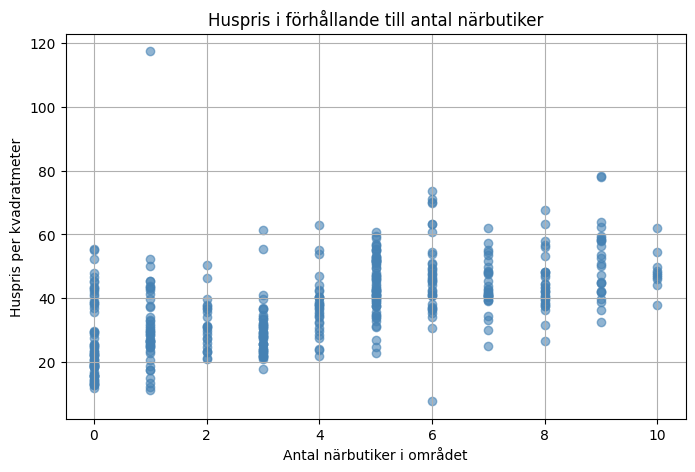

In [3]:
#Importera matplotlib
import matplotlib.pyplot as plt

#Gör din analys här
X = df_home["X4 number of convenience stores"]
Y = df_home["Y house price of unit area"]
 
plt.figure(figsize=(8,5))
plt.scatter(X, Y, alpha=0.6, color="steelblue")
 
plt.title("Huspris i förhållande till antal närbutiker")
plt.xlabel("Antal närbutiker i området")
plt.ylabel("Huspris per kvadratmeter")


#Skapa en graf
plt.grid(True)
plt.show()  

**Resultat**: Det finns ingen tydlig relation mellan antalet närbutiker i området och huspriset per kvadratmeter.
Priserna varierar kraftigt oavsett om området har få eller många närbutiker, och spridningen är stor i samtliga grupper.
Det går därför inte att dra slutsatsen att fler närbutiker leder till högre eller lägre bostadspriser baserat på denna data.



### ANALYS 2

**Fråga**: Påverkar äldre hus priset? Är nyare hus dyrare?

Korrelation mellan husets ålder och pris: -0.211
                                              No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of 

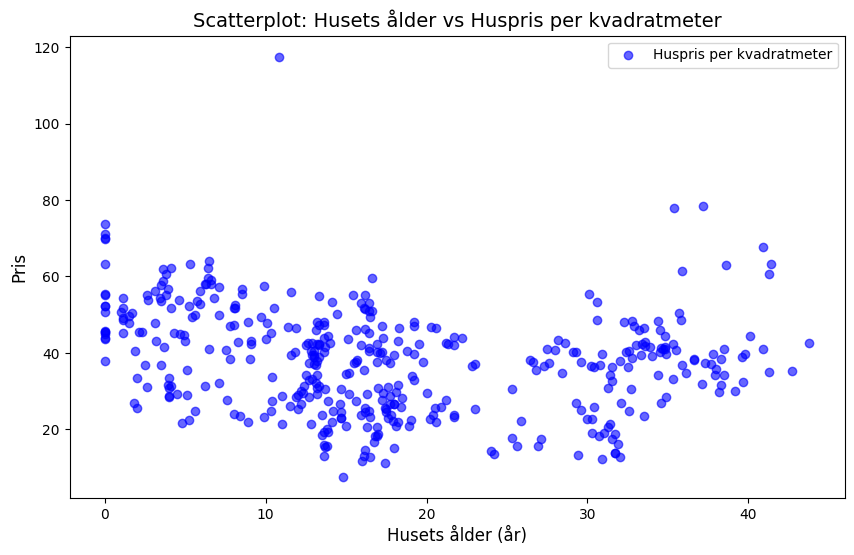

In [4]:
#Analys av korrelation mellan husets ålder och pris per enhet
import matplotlib.pyplot as plt

age = df_home["X2 house age"]
price = df_home["Y house price of unit area"]

#Beräkna korrelation
correlation = age.corr(price)
print("Korrelation mellan husets ålder och pris:", round(correlation, 3))
print(df_home.corr()) #Visa korrelationstabell för alla numeriska kolumner


#Skapa scatterplot
plt.figure(figsize=(10,6))
plt.scatter(df_home["X2 house age"], df_home["Y house price of unit area"], color='blue', alpha=0.6, label='Huspris per kvadratmeter')

#Lägg till titel och etiketter
plt.title("Scatterplot: Husets ålder vs Huspris per kvadratmeter", fontsize=14)
plt.xlabel("Husets ålder (år)", fontsize=12)
plt.ylabel("Pris", fontsize=12)
plt.legend()



#Visa plot
plt.show()


**Resultat**: Scatterploten visar att det inte finns någon tydlig linjär koppling mellan husets ålder och pris per kvadratmeter. Priserna varierar ganska mycket oavsett hur gammalt huset är, även om vissa äldre hus verkar ligga något lägre i pris. Det finns också några enstaka bostäder med ovanligt höga priser som sticker ut. Sammanfattningsvis tyder diagrammet på att åldern bara spelar en liten roll för priset, och att andra faktorer troligen påverkar priset mer. 

---

## STEG 4: PREDIKTIV MODELL 

**Uppgift**: Bygg en modell som förutsäger energiförbrukning

### 4.1 Välj Features

**Förklaring**: Vi valde X2(husets ålder), X3(avstånd till närmaste MRT-station), och X4(avstånd till närliggande butiker) eftersom vi tror att dessa faktorer påverkar huspriset. Äldre hus tenderar ofta att vara billigare, hus som ligger nära kollektivtrafik är mer attraktiva och dyrare, och fler närliggande butiker ökar livskvaliteten och därmed priset. 

In [43]:
#Importerta sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

#Features och target 
X = df_home [['X2 house age', 
           'X3 distance to the nearest MRT station', 
           'X4 number of convenience stores']]
Y = df_home ['Y house price of unit area']

#Träning och test (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Kolla storleken på de olika delarna
print("Träningsdata:", X_train.shape, Y_train.shape)
print("Testdata:", X_test.shape, Y_test.shape)


Träningsdata: (331, 3) (331,)
Testdata: (83, 3) (83,)


### 4.2 Bygg och träna modellen

In [44]:
#Skapa modellen
model = LinearRegression()


#Träna modellen med träningsdata
model.fit(X_train, Y_train) #modellen lär sig sambandet mellan features och target

#Gör prediktioner på testdata
Y_pred = model.predict(X_test) #modellen använder det den lärt sig för att förutsäga pris


print("Modellens koefficienter:", model.coef_) #vikter för varje feature
print("Modellens intercept:", model.intercept_) #baspris när alla features = 0

Modellens koefficienter: [-0.25840543 -0.00549834  1.24734248]
Modellens intercept: 43.51488014404391


### 4.3 Utvärdera modellen

R2 score visar hur stor del av variationen i huspriset som modellen lyckas förklara. 
R2 = 1.0 perfekt modell
R2 = 0.0 inget bättre än medelvärdet
R2 < 0 = sämre än att gissa medelvärdet

R²-score: 0.6489726933106555
MAE: 5.632384069009171


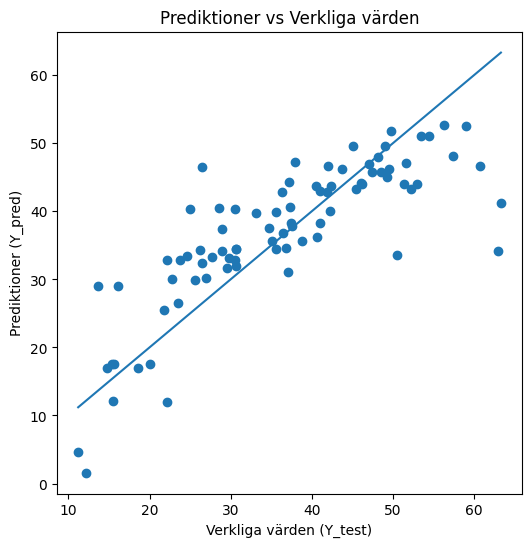

In [45]:
#R² score
r2 = r2_score(Y_test, Y_pred)
print("R²-score:", r2)


#Beräkna MAE (Mean Absolute Error)
mae = mean_absolute_error(Y_test, Y_pred)
print("MAE:", mae)


#Graf som visar prediktioner vs verkliga värden
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()])
plt.xlabel("Verkliga värden (Y_test)")
plt.ylabel("Prediktioner (Y_pred)")
plt.title("Prediktioner vs Verkliga värden")
plt.show()


**Resultat**: 
- R² Score: 0.65
- MAE: 5.63

**Diskussion**: Den linjära regressionsmodellen visar sig inte vara särskilt tillförlitlig för den här datan. Med ett R²-värde på 0,65 lyckas modellen bara förklara en del av variationen i de verkliga värdena, vilket betyder att den missar ganska mycket. I grafen ser man också att punkterna ligger utspridda runt linjen, vilket tyder på att modellen ofta gissar fel, särskilt vid högre och lägre värden.

Det här antyder att sambanden i datan är mer komplexa än vad en enkel rak linje kan fånga. Därför framstår den linjära modellen som ett mindre lämpligt val.

---

RANDOM FOREST REGSSION MODELL

In [47]:
# Importera sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Features och target
X = df_home[['X2 house age',
             'X3 distance to the nearest MRT station',
             'X4 number of convenience stores',
             'X5 latitude',
             'X6 longitude']]

Y = df_home['Y house price of unit area']

# Träning och test (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Skapa och träna modellen
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, Y_train)

# Kolla storleken på de olika delarna
print("Träningsdata:", X_train.shape, Y_train.shape)
print("Testdata:", X_test.shape, Y_test.shape)


Träningsdata: (331, 5) (331,)
Testdata: (83, 5) (83,)


R²-score (Random Forest): 0.7932143177968136
MAE (Random Forest): 4.243319755211319


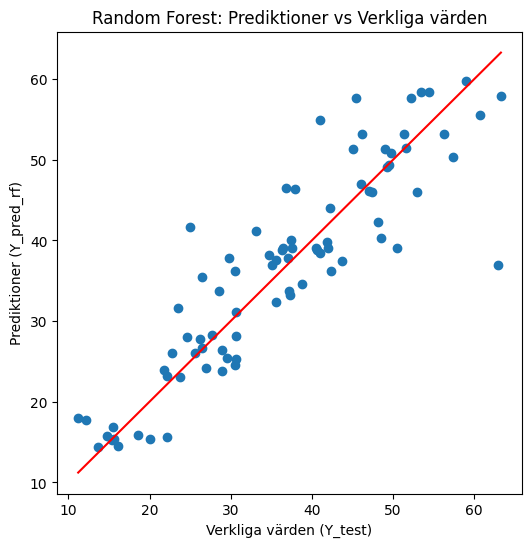

In [48]:
# 4.2 Bygg och träna modellen (Random Forest Regression)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Skapa modellen
rf_model = RandomForestRegressor(
    n_estimators=100,    # antal träd i skogen
    random_state=42      # för reproducerbarhet
)

# Träna modellen med träningsdata
rf_model.fit(X_train, Y_train)

# Gör prediktioner på testdata
Y_pred_rf = rf_model.predict(X_test)


# 4.3 Utvärdera modellen
# R²-score
r2_rf = r2_score(Y_test, Y_pred_rf)
print("R²-score (Random Forest):", r2_rf)

# MAE (Mean Absolute Error)
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
print("MAE (Random Forest):", mae_rf)

# Graf som visar prediktioner vs verkliga värden
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, Y_pred_rf)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red')
plt.xlabel("Verkliga värden (Y_test)")
plt.ylabel("Prediktioner (Y_pred_rf)")
plt.title("Random Forest: Prediktioner vs Verkliga värden")
plt.show()


Resultat: Vi har lagt till latitude och longitude i features och man ser att resultatet förbättras. Random Forest-modellen fångar nu sambandet mellan de verkliga priserna och de förutsagda värdena bättre. Det syns i grafen där fler punkter ligger nära den röda linjen, och spridningen minskar något jämfört med modellen utan dessa geografiska variabler.

Det högre R²-värdet på cirka 0.79 visar att modellen nu kan förklara en större del av variationen i huspriserna. Det betyder att platsinformationen är viktig för att förstå varför priserna skiljer sig åt mellan olika bostäder. MAE-värdet är också något lägre, vilket betyder att uppskattningarna i genomsnitt ligger närmare de verkliga priserna.

Sammanfattningsvis visar resultatet att modellen blir mer träffsäker när den får tillgång till mer relevant information, särskilt sådant som beskriver bostadens geografiska läge. Detta gör modellen mer realistisk och användbar för att uppskatta faktiska bostadspriser

## STEG 5: REKOMMENDATIONER - VG uppgift

Baserat på era analyser, ge  **1 konkret rekommendation**.

### REKOMMENDATION 1: Använd Random Forest-modellen och inkludera geografiska variabler för att förbättra förutsägelsen av bostadspriser

**Varför**: Resultaten visar att när latitude och longitude ingår i modellen ökar träffsäkerheten (högre R² och lägre MAE). Detta innebär att bostädernas geografiska läge är en viktig del av prissättningen. Genom att ge modellen mer information om platsen får den en bättre förståelse för varför vissa bostäder är dyrare än andra. Spridningen i grafen minskar också, vilket betyder att modellen gör mer stabila och pålitliga förutsägelser.

**Åtgärd**: Man bör fortsätta att använda geografiska variabler i modellen och samtidigt utöka feature-setet med fler relevanta faktorer som kan påverka bostadspriset. Det kan exempelvis vara närhet till skolor, parker eller shoppingområden.

**Effekt**: Genom att ge modellen mer och bättre information kan den göra mer realistiska och korrekta uppskattningar av bostadspriser. Detta leder till högre R², lägre felvärden och mer tillförlitliga prediktioner. Effekten blir att risken för över- eller undervärdering minskar, vilket i sin tur skapar bättre beslutsunderlag vid både försäljning och köp av bostäder

---